In [1]:
import os.path
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
import joblib
import DER
import gc
from IPython.display import display
plt.style.use("ggplot")

In [2]:
simulations = {}
for i in glob.glob("results/*"):
    name = os.path.basename(i).split('.')[0]
    simulations[name] = joblib.load(i)
    simulations[name].title = os.path.basename(i).replace(".gz", "").replace("_", " ")
    print(name)

r_once_reb_0_sun_4
r_once_reb_26(All)_sun_4
r_once_reb_26(PV)_sun_4
r_once_reb_26(PV)_sun_4_no_decom
r_once_reb_26(PV)_sun_7
r_reg_reb_0_sun_4
r_reg_reb_26(All)_sun_4
r_reg_reb_26(PV)_sun_4
r_reg_reb_26(PV)_sun_4_no_decom
r_reg_reb_26(PV)_sun_7


In [3]:
res = {}
for simulation_name, simulation in simulations.items():
    for lse in simulation.lses:
        res[(simulation_name, lse.name)] = lse.ramsey_price
res = pd.DataFrame(res, index=simulation.time)
res.dropna(inplace=True)
res = res.resample('m').min()
"""These are the files Dr. Charles needs"""
# res.to_excel("Ramsey_prices.xlsx")
# res.iloc[[0,-1]].T.to_excel("Ramsey_prices_first_and_last.xlsx")
res

C:\Users\vtt513\AppData\Local\Temp\ipykernel_18556\3545068640.py:7: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  res = res.resample('m').min()


r_once_reb_0_sun_4  \
           BOWLING_GREEN_Residential_High_Income   
2020-06-30                             95.053216   
2020-07-31                             95.053216   
2020-08-31                             95.053216   
2020-09-30                             95.053216   
2020-10-31                             95.053216   
...                                          ...   
2050-08-31                             95.053216   
2050-09-30                             95.053216   
2050-10-31                             95.053216   
2050-11-30                             95.053216   
2050-12-31                             95.053216   

                                                \
           CHATTANOOGA_Residential_High_Income   
2020-06-30                           86.069238   
2020-07-31                           86.069238   
2020-08-31                           86.069238   
2020-09-30                           86.069238   
2020-10-31                           86.069238   
...                                        ...   
2050-08-31                           86.069238   
2050-09-30                           86.069238   
2050-10-31                           86.069238   
2050-11-30                           86.069238   
2050-12-31                           86.069238   

                                                                               \
           CLEVELAND_Residential_High_Income COLUMBIA_Residential_High_Income   
2020-06-30                         88.095088                        88.614611   
2020-07-31                         88.095088                        88.614611   
2020-08-31                         88.095088                        88.614611   
2020-09-30                         88.095088                        88.614611   
2020-10-31                         88.095088                        88.614611   
...                                      ...                              ...   
2050-08-31                         88.095088                        88.614611   
2050-09-30                         88.095088                        88.614611   
2050-10-31                         88.095088                        88.614611   
2050-11-30                         88.095088                        88.614611   
2050-12-31                         88.095088                        88.614611   

                                                                               \
           PADUCAH_Residential_High_Income HUNTSVILLE_Residential_High_Income   
2020-06-30                       87.188468                          79.417543   
2020-07-31                       87.188468                          79.417543   
2020-08-31                       87.188468                          79.417543   
2020-09-30                       87.188468                          79.417543   
2020-10-31                       87.188468                          79.417543   
...                                    ...                                ...   
2050-08-31                       87.188468                          79.417543   
2050-09-30                       87.188468                          79.417543   
2050-10-31                       87.188468                          79.417543   
2050-11-30                       87.188468                          79.417543   
2050-12-31                       87.188468                          79.417543   

                                            \
           JACKSON_Residential_High_Income   
2020-06-30                       93.627448   
2020-07-31                       93.627448   
2020-08-31                       93.627448   
2020-09-30                       93.627448   
2020-10-31                       93.627448   
...                                    ...   
2050-08-31                       93.627448   
2050-09-30                       93.627448   
2050-10-31                       93.627448   
2050-11-30                       93.627448   
2050-12-31                       93.627448

C:\Users\vtt513\AppData\Local\Temp\ipykernel_18556\3111760669.py:14: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  tmp = tmp.resample('m').mean()


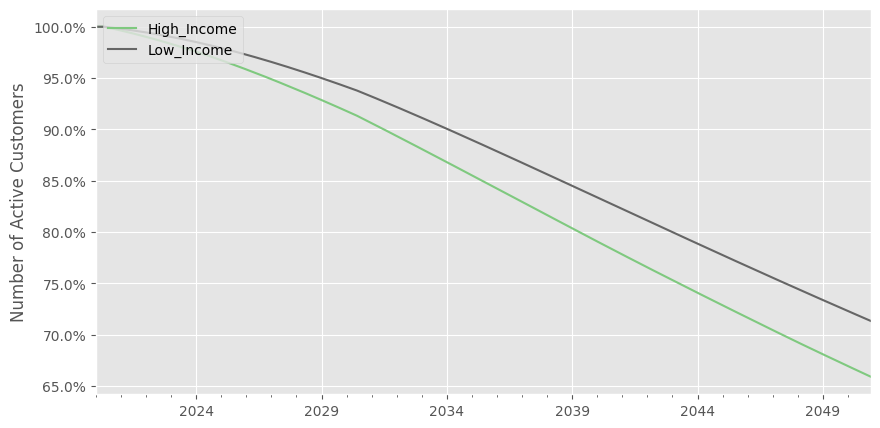

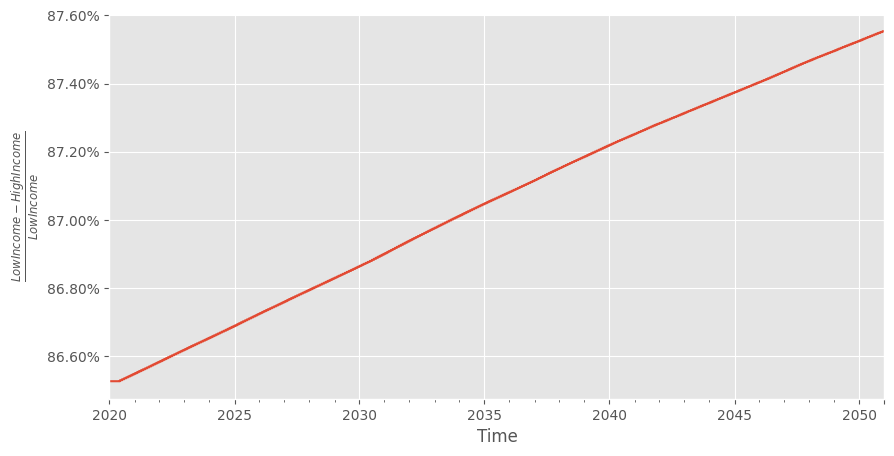

In [4]:
# Benchmark: Fixed Retail Prices
s = simulations["r_once_reb_26(PV)_sun_4"]
title = "Benchmark: Fixed Retail Prices"
plt.figure(figsize=(10,5), dpi=100)
ax = plt.gca()
tmp = pd.DataFrame(
    {
        income: pd.DataFrame({l.name: l.number_of_active_customers for l in s.lses if income in l.name}, index=s.time).sum(axis=1)
        for income in ["High_Income", "Low_Income"]
    },
    index=s.time
    )
tmp = tmp / tmp.iloc[0] * 100
tmp = tmp.resample('m').mean()

tmp.plot(ax=ax, colormap='Accent')
ax.legend(loc=2)
ax.set_ylabel("Number of Active Customers")
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
# ax2 = ax.twinx()
# (tmp[tmp.columns[1]] - tmp[tmp.columns[0]]).plot(ax=ax2, color='k', style='--', label='Difference')
# ax2.set_ylabel("--- Difference (#Customers)")
# ax2.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
if not os.path.exists("Figures for Paper"):
    os.mkdir("Figures for Paper")
plt.savefig("Figures for Paper\Benchmark - Fixed Retail Prices.png")
plt.show()

s = simulations["r_once_reb_26(PV)_sun_4"]
tmp = pd.DataFrame(
    {
        income: pd.DataFrame({l.name: l.number_of_active_customers for l in s.lses if income in l.name}, index=s.time).sum(axis=1)
        for income in ["High_Income", "Low_Income"]
    },
    index=s.time
    )

plt.figure(figsize=(10,5), dpi=100)
ax = plt.gca()
(
    (tmp["Low_Income"] - tmp["High_Income"]) / tmp['Low_Income'] * 100
).plot(ax=ax)
plt.xlabel("Time")
plt.ylabel(r"$\frac{LowIncome-HighIncome}{LowIncome}$")
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
plt.show()

C:\Users\vtt513\AppData\Local\Temp\ipykernel_18556\1099056593.py:14: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  tmp = tmp.resample('m').mean()


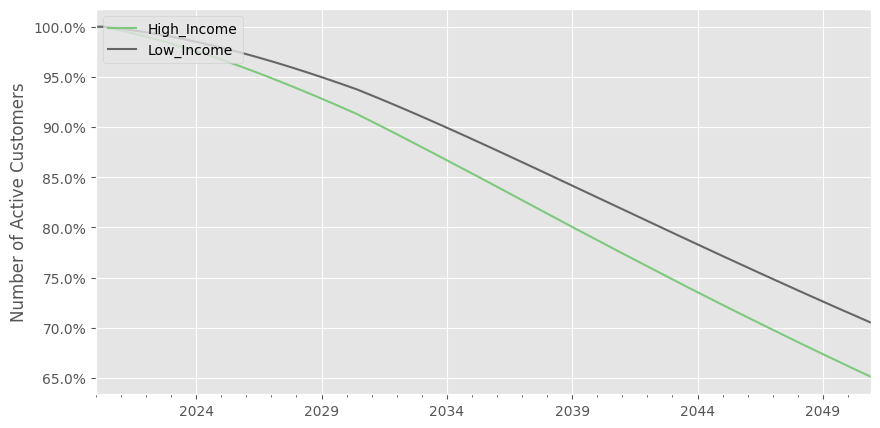

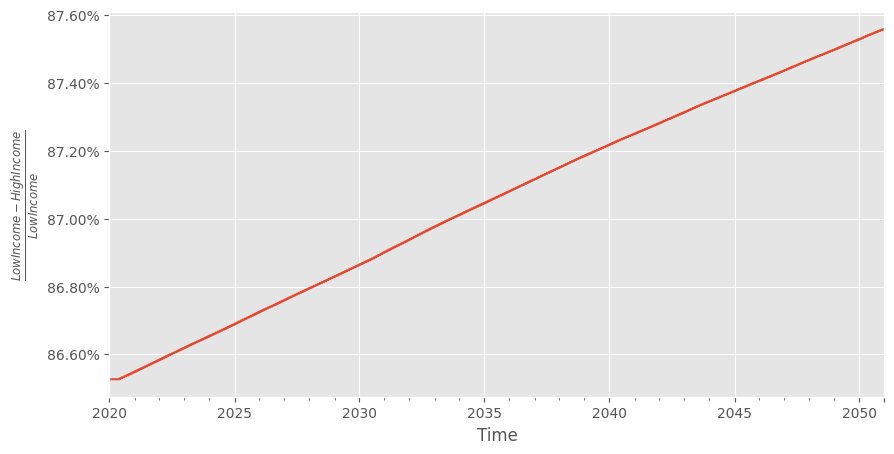

In [5]:
# Benchmark: Dynamic Retail Prices
s = simulations["r_reg_reb_26(PV)_sun_4"]
title = "Benchmark: Dynamic Retail Prices"
plt.figure(figsize=(10,5), dpi=100)
ax = plt.gca()
tmp = pd.DataFrame(
    {
        income: pd.DataFrame({l.name: l.number_of_active_customers for l in s.lses if income in l.name}, index=s.time).sum(axis=1)
        for income in ["High_Income", "Low_Income"]
    },
    index=s.time
    )
tmp = tmp / tmp.iloc[0] * 100
tmp = tmp.resample('m').mean()

tmp.plot(ax=ax, colormap='Accent')
ax.legend(loc=2)
ax.set_ylabel("Number of Active Customers")
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
# ax2 = ax.twinx()
# (tmp[tmp.columns[1]] - tmp[tmp.columns[0]]).plot(ax=ax2, color='k', style='--', label='Difference')
# ax2.set_ylabel("--- Difference (#Customers)")
# ax2.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
plt.savefig("Figures for Paper\Benchmark - Dynamic Retail Prices.png")
plt.show()

s = simulations["r_reg_reb_26(PV)_sun_4"]
tmp = pd.DataFrame(
    {
        income: pd.DataFrame({l.name: l.number_of_active_customers for l in s.lses if income in l.name}, index=s.time).sum(axis=1)
        for income in ["High_Income", "Low_Income"]
    },
    index=s.time
    )

plt.figure(figsize=(10,5), dpi=100)
ax = plt.gca()
(
    (tmp["Low_Income"] - tmp["High_Income"]) / tmp['Low_Income'] * 100
).plot(ax=ax)
plt.xlabel("Time")
plt.ylabel(r"$\frac{LowIncome-HighIncome}{LowIncome}$")
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
plt.show()

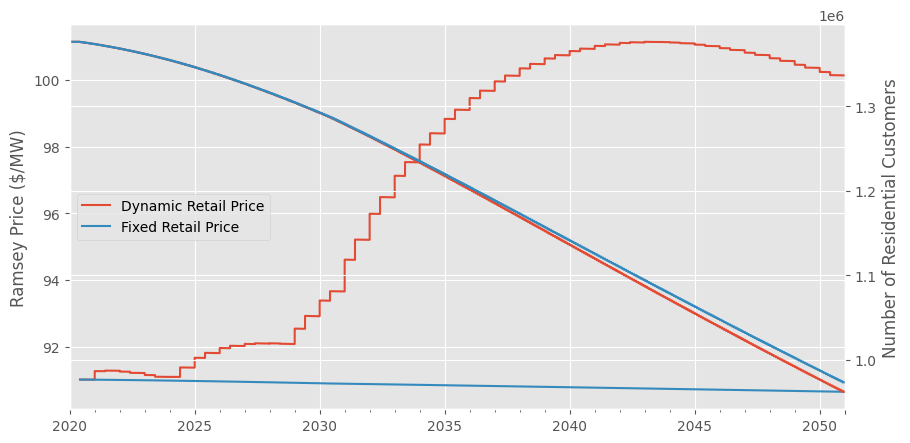

In [6]:
# Ramsey Prices vs Number of Customers
plt.figure(figsize=(10,5), dpi=100)
ax = plt.gca()
ax.set_ylabel("Ramsey Price ($/MW)")
ax2 = ax.twinx()
ax2.set_ylabel("Number of Residential Customers")

for simulation_name, label in [
    ["r_reg_reb_26(PV)_sun_4", "Dynamic Retail Price"],
    ["r_once_reb_26(PV)_sun_4", "Fixed Retail Price"]
]:
    s = simulations[simulation_name]
    tmp1_customers = pd.DataFrame({l.name: l.number_of_active_customers for l in s.lses if "Residential" in l.name}, index=s.time)
    tmp1_ramsey = pd.DataFrame({l.name: l.ramsey_price for l in s.lses if "Residential" in l.name}, index=s.time)
    tmp1_demand = pd.DataFrame({l.name: l.demand for l in s.lses if "Residential" in l.name}, index=s.time)
    tmp1 = (tmp1_demand * tmp1_ramsey).sum(axis=1) / tmp1_demand.sum(axis=1)
    tmp1 = tmp1.where(tmp1 > 0)
    tmp1.plot(ax=ax, label=label)
    tmp1_customers.sum(axis=1).plot(ax=ax2, label=label)

ax.legend(loc='center left')
plt.show()

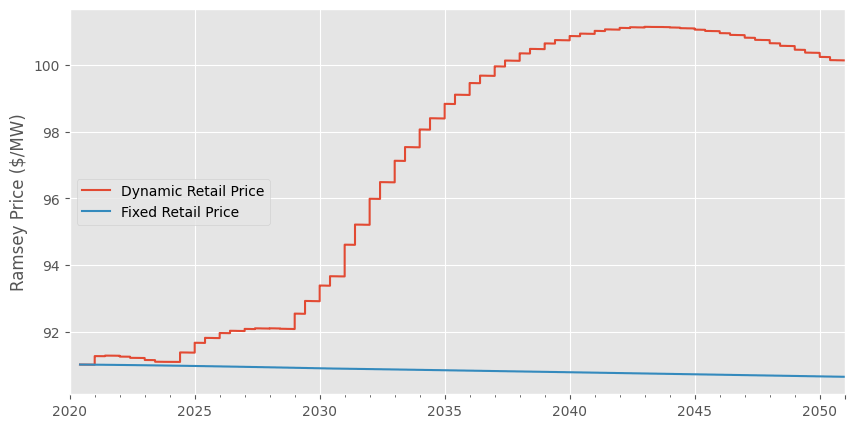

In [7]:
# Ramsey Prices vs Number of Customers
plt.figure(figsize=(10,5), dpi=100)
ax = plt.gca()
ax.set_ylabel("Ramsey Price ($/MW)")

for simulation_name, label in [
    ["r_reg_reb_26(PV)_sun_4", "Dynamic Retail Price"],
    ["r_once_reb_26(PV)_sun_4", "Fixed Retail Price"]
]:
    s = simulations[simulation_name]
    tmp1_customers = pd.DataFrame({l.name: l.number_of_active_customers for l in s.lses if "Residential" in l.name}, index=s.time)
    tmp1_ramsey = pd.DataFrame({l.name: l.ramsey_price for l in s.lses if "Residential" in l.name}, index=s.time)
    tmp1_demand = pd.DataFrame({l.name: l.demand for l in s.lses if "Residential" in l.name}, index=s.time)
    tmp1 = (tmp1_demand * tmp1_ramsey).sum(axis=1) / tmp1_demand.sum(axis=1)
    tmp1 = tmp1.where(tmp1 > 0)
    tmp1.plot(ax=ax, label=label)

ax.legend(loc='center left')
plt.show()

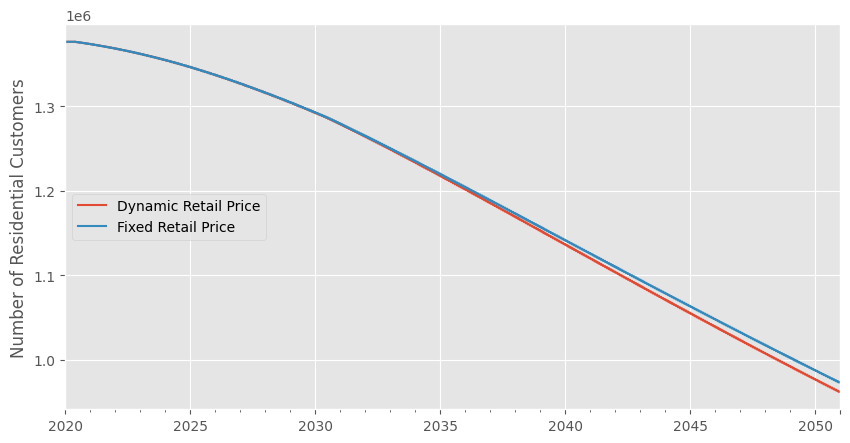

In [8]:
# Ramsey Prices vs Number of Customers
plt.figure(figsize=(10,5), dpi=100)
ax = plt.gca()
ax.set_ylabel("Number of Residential Customers")

for simulation_name, label in [
    ["r_reg_reb_26(PV)_sun_4", "Dynamic Retail Price"],
    ["r_once_reb_26(PV)_sun_4", "Fixed Retail Price"]
]:
    s = simulations[simulation_name]
    tmp1_customers = pd.DataFrame({l.name: l.number_of_active_customers for l in s.lses if "Residential" in l.name}, index=s.time)
    tmp1_ramsey = pd.DataFrame({l.name: l.ramsey_price for l in s.lses if "Residential" in l.name}, index=s.time)
    tmp1_demand = pd.DataFrame({l.name: l.demand for l in s.lses if "Residential" in l.name}, index=s.time)
    tmp1 = (tmp1_demand * tmp1_ramsey).sum(axis=1) / tmp1_demand.sum(axis=1)
    tmp1 = tmp1.where(tmp1 > 0)
    # tmp1.plot(ax=ax, label=label)
    tmp1_customers.sum(axis=1).plot(ax=ax, label=label)

ax.legend(loc='center left')
plt.show()

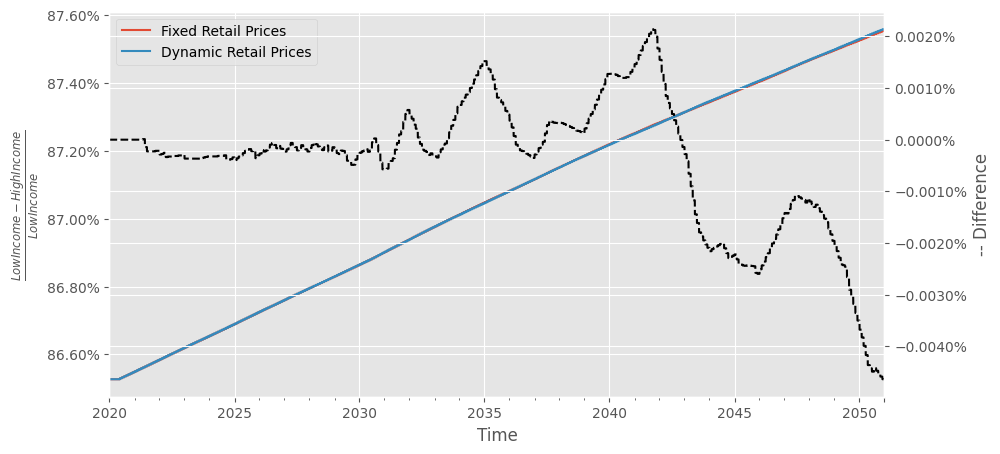

In [9]:
# Number of Customers - Ratio Low to High Income
plt.figure(figsize=(10,5), dpi=100)
ax = plt.gca()

s = simulations["r_once_reb_26(PV)_sun_4"]
tmp = pd.DataFrame(
    {
        income: pd.DataFrame({l.name: l.number_of_active_customers for l in s.lses if income in l.name}, index=s.time).sum(axis=1)
        for income in ["High_Income", "Low_Income"]
    },
    index=s.time
    )


tmp1 = (tmp["Low_Income"] - tmp["High_Income"]) / tmp['Low_Income'] * 100
tmp1.plot(ax=ax, label="Fixed Retail Prices")

s = simulations["r_reg_reb_26(PV)_sun_4"]
tmp = pd.DataFrame(
    {
        income: pd.DataFrame({l.name: l.number_of_active_customers for l in s.lses if income in l.name}, index=s.time).sum(axis=1)
        for income in ["High_Income", "Low_Income"]
    },
    index=s.time
    )
tmp2 = (tmp["Low_Income"] - tmp["High_Income"]) / tmp['Low_Income'] * 100
tmp2.plot(ax=ax, label="Dynamic Retail Prices")

plt.xlabel("Time")
plt.ylabel(r"$\frac{LowIncome-HighIncome}{LowIncome}$")
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
plt.legend()

ax2 = ax.twinx()
(tmp1-tmp2).plot(ax=ax2, ls='--', color='k')
ax2.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
ax2.set_ylabel("-- Difference")

plt.show()

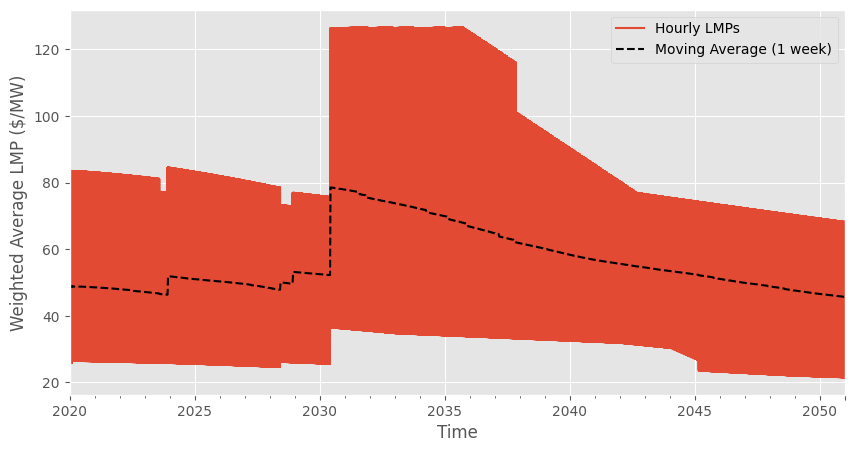

In [10]:
# LMPs
s = simulations["r_reg_reb_26(PV)_sun_4"]
tmp = (
    pd.DataFrame({l.name: l.lmp for l in s.lses if "Residential" in l.name}, index=s.time)
    * pd.DataFrame({l.name: l.demand for l in s.lses if "Residential" in l.name}, index=s.time)
).sum(axis=1) / pd.DataFrame({l.name: l.demand for l in s.lses if "Residential" in l.name}, index=s.time).sum(axis=1)

plt.figure(figsize=(10,5), dpi=100)
ax = plt.gca()
tmp.plot(ax=ax)
tmp.rolling(24*7).mean().plot(ax=ax, style='--', color='k')
plt.legend(["Hourly LMPs", "Moving Average (1 week)"])
plt.xlabel("Time")
plt.ylabel("Weighted Average LMP ($/MW)")
plt.show()

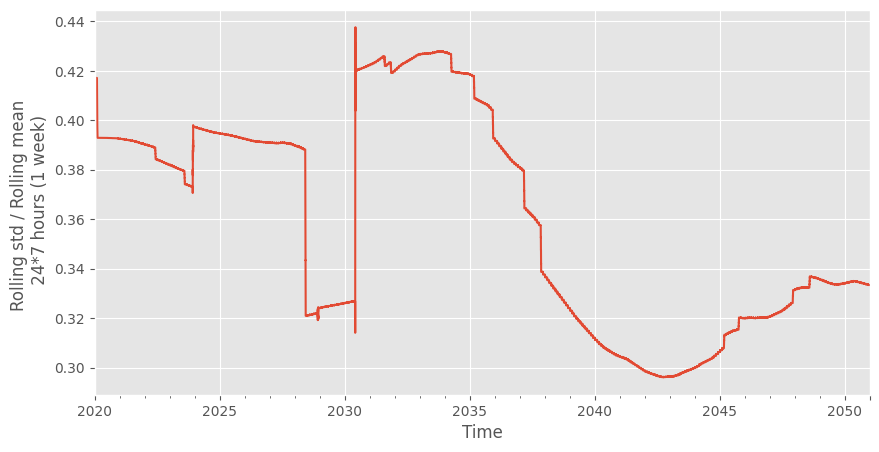

In [11]:
# Coefficient of variation
s = simulations["r_reg_reb_26(PV)_sun_4"]
tmp = (
    pd.DataFrame({l.name: l.lmp for l in s.lses if "Residential" in l.name}, index=s.time)
    * pd.DataFrame({l.name: l.demand for l in s.lses if "Residential" in l.name}, index=s.time)
).sum(axis=1) / pd.DataFrame({l.name: l.demand for l in s.lses if "Residential" in l.name}, index=s.time).sum(axis=1)

plt.figure(figsize=(10,5), dpi=100)
ax = plt.gca()
(tmp.rolling(24*7).std() / tmp.rolling(24*6).mean()).plot(ax=ax)
plt.xlabel("Time")
plt.ylabel("Rolling std / Rolling mean \n 24*7 hours (1 week)")
plt.show()

# Comparing Low Income Ratios

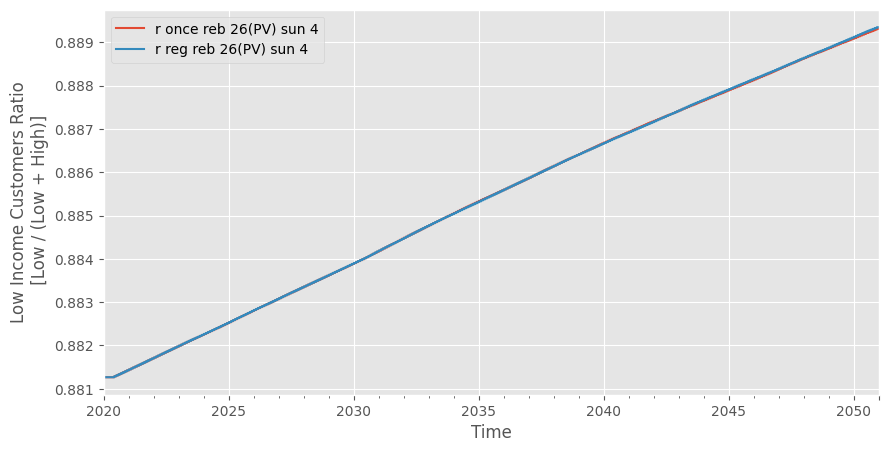

In [12]:
s2 = simulations['r_reg_reb_26(PV)_sun_4']
s1 = simulations['r_once_reb_26(PV)_sun_4']

s2.legend_label = "Benchmark: Dynamic Retail Prices"
s1.legend_label = "Benchmark: Fixed Retail Prices"


plt.figure(figsize=(10,5))
ax = plt.gca()
tmp = []
for s in [s1, s2]:
    tmp.append(
        pd.DataFrame({l.name: l.number_of_active_customers for l in s.lses if "Low_Income" in l.name}, index=s.time).sum(axis='columns') /
        (
            pd.DataFrame({l.name: l.number_of_active_customers for l in s.lses if "High_Income" in l.name}, index=s.time).sum(axis='columns')
            + pd.DataFrame({l.name: l.number_of_active_customers for l in s.lses if "Low_Income" in l.name}, index=s.time).sum(axis='columns')
        )
    )
    tmp[-1].plot(label=s.title)
plt.xlabel("Time")
plt.ylabel("Low Income Customers Ratio\n [Low / (Low + High)]")
plt.legend()
plt.savefig("Figures for Paper\Low Income Ratio Comparison.png")
plt.show()

# Comparison: 4 Sun Hours vs 7 Sun Hours

C:\Users\vtt513\AppData\Local\Temp\ipykernel_18556\1206657970.py:15: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  ).resample('m').mean()


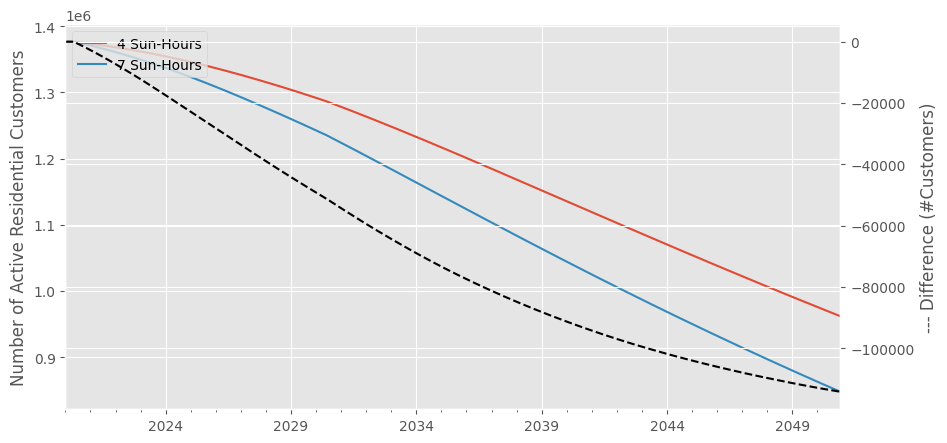

In [13]:
s1 = simulations['r_reg_reb_26(PV)_sun_4']
s2 = simulations['r_reg_reb_26(PV)_sun_7']

s1.legend_label = "4 Sun-Hours"
s2.legend_label = "7 Sun-Hours"

plt.figure(figsize=(10,5), dpi=100)
ax = plt.gca()
tmp = pd.DataFrame(
    {
        s.legend_label: pd.DataFrame({l.name: l.number_of_active_customers for l in s.lses if "Residential" in l.name}, index=s.time).sum(axis=1)
        for s in [s1, s2]
    },
    index=s1.time
    ).resample('m').mean()

tmp.plot(ax=ax)
ax.legend(loc=2)
ax.set_ylabel("Number of Active Residential Customers")
ax2 = ax.twinx()
(tmp[s2.legend_label] - tmp[s1.legend_label]).plot(ax=ax2, color='k', style='--', label='Difference')
ax2.set_ylabel(f"--- Difference (#Customers)")
plt.savefig("Figures for Paper\Sun Hours Comparison.png")
plt.show()

# Comparison: Rebates vs. No Rebates

C:\Users\vtt513\AppData\Local\Temp\ipykernel_18556\213521547.py:15: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  ).resample('m').mean()


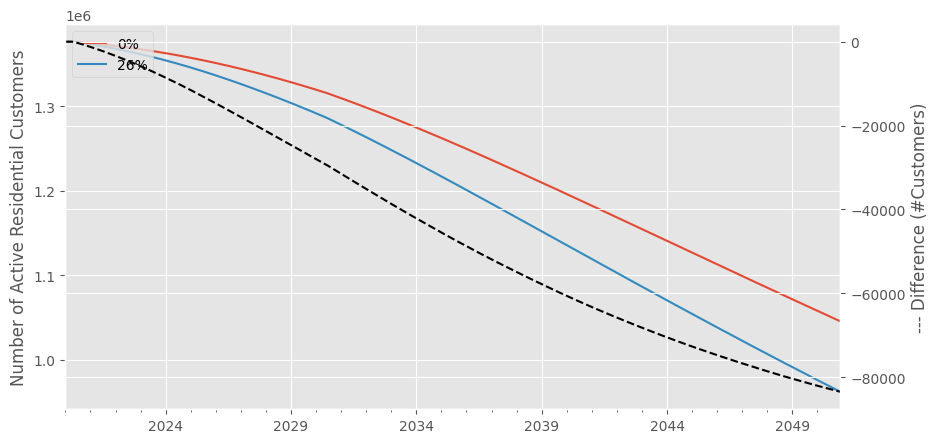

In [14]:
s2 = simulations['r_reg_reb_26(PV)_sun_4']
s1 = simulations['r_reg_reb_0_sun_4']

s2.legend_label = "26%"
s1.legend_label = "0%"

plt.figure(figsize=(10,5), dpi=100)
ax = plt.gca()
tmp = pd.DataFrame(
    {
        s.legend_label: pd.DataFrame({l.name: l.number_of_active_customers for l in s.lses if "Residential" in l.name}, index=s.time).sum(axis=1)
        for s in [s1, s2]
    },
    index=s1.time
    ).resample('m').mean()

tmp.plot(ax=ax)
ax.legend(loc=2)
ax.set_ylabel("Number of Active Residential Customers")
ax2 = ax.twinx()
(tmp[s2.legend_label] - tmp[s1.legend_label]).plot(ax=ax2, color='k', style='--', label='Difference')
ax2.set_ylabel(f"--- Difference (#Customers)")
plt.savefig("Figures for Paper\Rebates vs. No Rebates.png")
plt.show()